# Choropleth maps using pandas

The aim here is to create a choropleth map using data from a tutorial which can be found <a href="https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d">here</a>

Note: there is a mistake in the author's final result as he uses the wrong 'column', and therefore doesn't actually show mortality. 

# Setting up 

We'll need to import a few packages to make this work. 

Really we should be able to do import geopandas as gpd but not already installed in conda, so just did it this way. better to install first then work in notebook. 

#### A word of caution when using geopandas

You need to make sure you carefully follow the installation documentation. 
You can read it <a href="https://geopandas.readthedocs.io/en/latest/install.html">here</a>  

When using conda, make sure you use this new environment 'geo_env' so that you don't have any conflicts when using geopandas. 

In [14]:

%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#import geopandas as gpd
#import fiona
#import descartes

In [15]:
import geopandas as gpd
gpd.__version__

'0.6.2'

# setting up (london) shape file

In [16]:
#when saving you need to make sure you have the .shx AND .shp files stored together! 

fp= "statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"

map_df = gpd.read_file(fp)

In [17]:
# check data is loaded
map_df.head(n=8)

#preview the map 


,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18..."
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19..."
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19..."


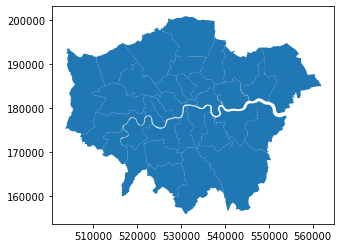

In [18]:
map_df.plot()

# setting up the data 

Data here varies for multiple years. last updated 2 months ago (from site)
You can download the data yourself <a href="https://data.london.gov.uk/dataset/london-borough-profiles">here</a>  


In [19]:

df = pd.read_csv('GLA_london_borough_profiles.csv', header=0)
df.head()

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2017,GLA Household Estimate 2017,Inland Area (Hectares),Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015",...,Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
2,E09000002,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
3,E09000003,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
4,E09000004,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6


# cleaning the dataframes

In [20]:
df.columns

Index(['Code', 'New code', 'Area name', 'Inner/ Outer London',
       'GLA Population Estimate 2017', 'GLA Household Estimate 2017',
       'Inland Area (Hectares)', 'Population density (per hectare) 2017',
       'Average Age, 2017', 'Proportion of population aged 0-15, 2015',
       'Proportion of population of working-age, 2015',
       'Proportion of population aged 65 and over, 2015',
       'Net internal migration (2015)', 'Net international migration (2015)',
       'Net natural change (2015)',
       '% of resident population born abroad (2015)',
       'Largest migrant population by country of birth (2011)',
       '% of largest migrant population (2011)',
       'Second largest migrant population by country of birth (2011)',
       '% of second largest migrant population (2011)',
       'Third largest migrant population by country of birth (2011)',
       '% of third largest migrant population (2011)',
       '% of population from BAME groups (2016)',
       '% people aged 3+

In [21]:
# here we want to keep the columns of interest. 


df = df[['Area name',
     'Happiness score 2011-14 (out of 10)', 
     'Anxiety score 2011-14 (out of 10)', 
     'Population density (per hectare) 2017', 
     'Mortality rate from causes considered preventable 2012/14']]

In [22]:
#rename the columns to simpler names 
data_for_map = df.rename(index=str, columns={
    'Area name': 'borough',
    'Happiness score 2011-14 (out of 10)': 'happiness',
    'Anxiety score 2011-14 (out of 10)': 'anxiety',
    'Population density (per hectare) 2017': 'pop_density_per_hectare',
    'Mortality rate from causes considered preventable 2012/14': 'mortality'})

# check the dataframe looks right
data_for_map.head(n=3)


,borough,happiness,anxiety,pop_density_per_hectare,mortality
0,NaN,NaN,NaN,NaN,NaN
1,City of London,6.0,5.6,30.3,129
2,Barking and Dagenham,7.1,3.1,57.9,228


In [23]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('NAME').join(data_for_map.set_index('borough'))
merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,happiness,anxiety,pop_density_per_hectare,mortality
NAME,,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",7.4,3.3,47.1,141
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",7.2,3.3,44.7,178
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",7.4,3.3,21.8,148
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",7.4,3.4,49,166
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",7.3,3.6,63.3,164


# creating the map

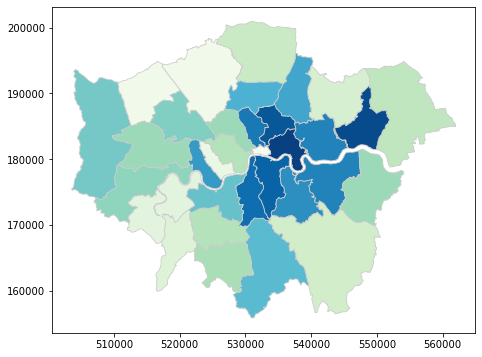

In [54]:
# set a variable that will call whatever column we want to visualise on the map
mortality = 'mortality'
# set the range for the choropleth
vmin, vmax = 100, 250
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=mortality, cmap='GnBu', linewidth=0.8, ax=ax, edgecolor='0.8')

# customisation

In [55]:
# remove the axis
ax.axis('off')

# add a title
ax.set_title('Preventable death rate in London', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: London Datastore, 2014',xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, color='#555555')
            
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='GnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)            

# save!

In [56]:
# save as a png file!
fig.savefig('map_mortality_export.png', dpi=300)

 # end